In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
PATHNAME = "test"

In [3]:
filename = "1/7.jpg"

In [4]:
file_path = os.path.join(PATHNAME, filename)

In [5]:
img = cv2.imread(file_path)

In [6]:
img.shape

(244, 244, 3)

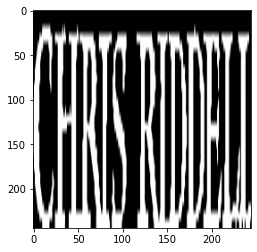

In [7]:
color = (255, 255, 255)
img = cv2.line(img, (0,0), (244,0), color, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.show()
t = np.sum(img[1,:][:,0]==255)

In [8]:
t

0

(244, 244, 3)
4548 15641


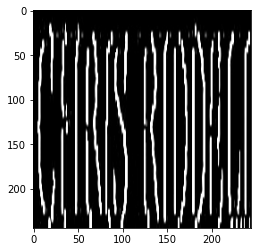

In [9]:
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
edges_x = cv2.filter2D(img,cv2.CV_8U,kernelx)
edges_y = cv2.filter2D(img,cv2.CV_8U,kernely)
plt.imshow(edges_y,cmap=plt.cm.gray)
img[edges_x==255]
plt.imshow(edges_x)
h, w, _=img.shape
im = np.zeros_like(img)
bt, wt = 0, 0
print(im.shape)
for i in range(h):
    for j in range(w-1):
        if edges_x[i][j][0]!=0:
            if img[i][j][+1] == 255:
                wt+=1
            else:
                bt+=1
print(wt, bt)


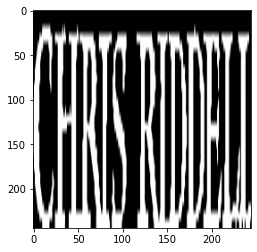

In [10]:
img = cv2.bitwise_and(img, img, edges_y)
plt.imshow(img,cmap=plt.cm.gray)


In [11]:
edges_x

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 21,  21,  21],
        [255, 255, 255],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 21,  21,  21],
        [255, 255, 255],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 21,  21,  21],
        [255, 255, 255],
        [  0,   0,   0]]

In [12]:
np.sum(edges_y[1,:][:,0]==255)

0

In [13]:
def gradient_y(img):
    kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    edges_y = cv2.filter2D(img,cv2.CV_8U,kernely)
    return edges_y
def gradient_x(img):
    kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
    edges_x = cv2.filter2D(img,cv2.CV_8U,kernelx)
    return edges_x

In [14]:
def count_y(edges_y):
    return np.sum(edges_y[1,:][:,0]==255)

In [15]:
def count_text(img, edges_x):
    h, w, _=img.shape
    cb, cw = 0, 0
    for i in range(h):
        for j in range(w-1):
            if edges_x[i][j][0]==0:
                if img[i][j][0] == 255:
                    cw+=1
                else:
                    cb+=1
    return cw, cb

In [16]:
def draw_line(img):
    h, w, _ = img.shape
    color = (255, 255, 255)
    img = cv2.line(img, (0,0), (244,0), color, 1)
    return img

In [19]:
from keras.models import load_model
from keras.preprocessing import image

ModuleNotFoundError: No module named 'keras'

In [18]:
import glob
def read_file_folder(folder_name, str_type):
    file_list = []
    st=folder_name+str_type
    for filename in glob.glob(st): #assuming gif
        file_list.append(filename)
    return file_list

In [ ]:
model_path="model_saved_new.h5"

In [24]:
list_file = read_file_folder("test/1/", "*.jpg")
wh,b=0,0
for file_name in list_file:
    img = cv2.imread(file_name)
    h, w, _ = img.shape
    img = draw_line(img)
    edges_y = gradient_y(img)
    edges_x = gradient_x(img)
    count = count_y(edges_y)
    #print(count)
    print(file_name)
    
    if count< w/5:
        wh+=1
        print("white")
    if count>4*w/5:
        b+=1
        print("black")
    """
    if count >=w/5 and count<=4*w/5:
        t1 = np.sum(img[:,:int(h/10)]==255)
        t2 = np.sum(img[:,:int(h/10)]==0)
        cw, cb = count_text(img, edges_x)
        print(cw, cb)
        if cw>cb:
            wh+=1
        else:
            b+=1
            print("white")
    """ 
print(wh, b, len(list_file))

test/1/92.jpg
black
test/1/136.jpg
black
test/1/21.jpg
black
test/1/138.jpg
black
test/1/186.jpg
black
test/1/90.jpg
black
test/1/146.jpg
black
test/1/7.jpg
black
test/1/87.jpg
black
test/1/91.jpg
test/1/89.jpg
test/1/158.jpg
black
test/1/127.jpg
black
test/1/195.jpg
black
test/1/189.jpg
black
test/1/185.jpg
black
test/1/97.jpg
black
test/1/190.jpg
black
test/1/48.jpg
black
test/1/163.jpg
black
test/1/35.jpg
test/1/123.jpg
black
test/1/204.jpg
black
test/1/54.jpg
test/1/207.jpg
black
test/1/67.jpg
black
test/1/86.jpg
black
test/1/12.jpg
black
test/1/183.jpg
black
test/1/179.jpg
black
test/1/157.jpg
test/1/66.jpg
black
test/1/70.jpg
black
test/1/137.jpg
black
test/1/77.jpg
black
test/1/180.jpg
black
test/1/94.jpg
black
test/1/106.jpg
black
test/1/160.jpg
black
test/1/41.jpg
test/1/10.jpg
black
test/1/161.jpg
black
test/1/112.jpg
black
test/1/9.jpg
black
test/1/209.jpg
test/1/191.jpg
black
test/1/170.jpg
black
test/1/49.jpg
black
test/1/155.jpg
test/1/13.jpg
black
test/1/40.jpg
black
tes

In [302]:
list_file = read_file_folder("test/1/", "*.jpg")
wh,b=0,0
for file_name in list_file:
    img = cv2.imread(file_name)
    h, w, _ = img.shape
    img = draw_line(img)
    edges_y = gradient_y(img)
    edges_x = gradient_x(img)
    count = count_y(edges_y)
    #print(count)
    print(file_name)
    
    if count< w/5:
        wh+=1
        print("white")
    if count>4*w/5:
        b+=1
    if count >=w/5 and count<=4*w/5:
        t1 = np.sum(img[:,:int(h/10)]==255)
        t2 = np.sum(img[:,:int(h/10)]==0)
        cw, cb = count_text(img, edges_x)
        print(cw, cb)
        if cw>cb:
            wh+=1
        else:
            b+=1
            print("white")
        
print(wh, b, len(list_file))

test/1/92.jpg
test/1/136.jpg
test/1/21.jpg
test/1/138.jpg
test/1/186.jpg
test/1/90.jpg
test/1/146.jpg
test/1/7.jpg
test/1/87.jpg
test/1/91.jpg
12216 23087
white
test/1/89.jpg
10380 28893
white
test/1/158.jpg
test/1/127.jpg
test/1/195.jpg
test/1/189.jpg
test/1/185.jpg
test/1/97.jpg
test/1/190.jpg
test/1/48.jpg
test/1/163.jpg
test/1/35.jpg
11666 27349
white
test/1/123.jpg
test/1/204.jpg
test/1/54.jpg
9753 30076
white
test/1/207.jpg
test/1/67.jpg
test/1/86.jpg
test/1/12.jpg
test/1/183.jpg
test/1/179.jpg
test/1/157.jpg
9124 30973
white
test/1/66.jpg
test/1/70.jpg
test/1/137.jpg
test/1/77.jpg
test/1/180.jpg
test/1/94.jpg
test/1/106.jpg
test/1/160.jpg
test/1/41.jpg
4617 41721
white
test/1/10.jpg
test/1/161.jpg
test/1/112.jpg
test/1/9.jpg
test/1/209.jpg
5968 39893
white
test/1/191.jpg
test/1/170.jpg
test/1/49.jpg
test/1/155.jpg
5428 38298
white
test/1/13.jpg
test/1/40.jpg
test/1/38.jpg
test/1/142.jpg
test/1/188.jpg
test/1/46.jpg
test/1/176.jpg
13587 38587
white
test/1/203.jpg
test/1/20.jpg
te